# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [ ]:
## For written responses to questions, I have commented out my response.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [33]:
! git clone https://github.com/arya-rajesh-99/undergrad_ml_assignments
%run ./undergrad_ml_assignments/get_data.py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

fatal: destination path 'undergrad_ml_assignments' already exists and is not an empty directory.


<Figure size 640x480 with 0 Axes>

In [34]:
# Question 1
### 1. Taking commas out of price.
airbnb_df = pd.read_csv('./data/airbnb_NYC.csv', encoding = "latin1")
airbnb_df['Price'].unique()
airbnb_df['Price_clean']= airbnb_df['Price'].str.replace(',', '', regex= True).astype(int)
airbnb_df['Price_clean'].unique()
missing_prices = airbnb_df['Price_clean'].isna().sum()
print("Number of missing prices are " + str(missing_prices))

Number of missing prices are 0


In [35]:
# Question 1 (continued)
### 2. minnesota police categorical var
# cleaning subject injury
police_df = pd.read_csv('./data/mn_police_use_of_force.csv')
police_df['subject_injury'].unique()

police_df['subject_injury_clean']= police_df['subject_injury'].fillna("Missing")
police_df['subject_injury_clean'].unique()

# finding proportion missing
missing_injury = police_df['subject_injury'].isna().mean()
print("Proportion of missing values are " + str(missing_injury))
## Proportion of missing values are 0.7619342359767892.

#cross tabulation
injury_force_cross = pd.crosstab(police_df['force_type'],
                                 police_df['subject_injury_clean'],
                                           dropna = False)

print(injury_force_cross)
# filled with missing earlier.
## From what I see, the data that is missing seems to be force types that
## are least likely to result in death. For example, bodily force and chemical
## irritant have a high number of missing values.


Proportion of missing values are 0.7619342359767892
subject_injury_clean         Missing    No   Yes
force_type                                      
Baton                              2     0     2
Bodily Force                    7051  1093  1286
Chemical Irritant               1421   131    41
Firearm                            0     2     0
Gun Point Display                 27    33    44
Improvised Weapon                 74    34    40
Less Lethal                       87     0     0
Less Lethal Projectile             0     1     2
Maximal Restraint Technique      170     0     0
Police K9 Bite                    31     2    44
Taser                            985   150   172


In [44]:
# Question 1 (continued)

### 3. dummy variable
metabric_df = pd.read_csv('./data/metabric.csv')
metabric_df['Overall Survival Status'].unique()
metabric_df['Overall Survival Status Binary'] = metabric_df['Overall Survival Status'].str[0].astype(int)
metabric_df['Overall Survival Status Binary'].unique()

array([0, 1])

In [39]:
# Question 1 (continued)

### 4. missing values of review scores rating
missing_reviews = airbnb_df['Review Scores Rating'].isna().sum()
print("Number of missing reviews are " + str(missing_reviews))
# median
median_missing = airbnb_df['Review Scores Rating'].median()
airbnb_df['Review Scores Rating Median'] = airbnb_df['Review Scores Rating'].fillna(median_missing)
# This may bias results because the median does not account for variablity
# in the data for which the missing values may have been.

Number of missing reviews are 8323


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [10]:
# Question 2
import matplotlib.pyplot as plt
### 1. opening the file
# it's a xlsx so will have to read as excel and upload into colab

shark_attacks_df = pd.read_excel('./GSAF5.xls')
shark_attacks_df.head()

### 2. drop columns
shark_attacks_df = shark_attacks_df.dropna(axis=1, how='all')

### 3. observation
shark_attacks_df.head()
shark_attacks_df['Location'].unique()

# From a general scan of the data, I see that the locations of the attacks are
# in common diving areas/bodies ofw water but the locations vary geographically
# across many countries and coasts. When cleaning and analyzing the data
# because this variable has inconsistent formatting so we know we have to clean
# this in depth. Additionally, grouping the locations may be difficult as it
# seems that the locations vary signficantly.

FileNotFoundError: [Errno 2] No such file or directory: './GSAF5.xls'

[2026. 2016. 2025. 2024. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 1873.
 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 18

/tmp/ipython-input-2534113332.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks_recent['Year_clean'] = shark_attacks_recent['Year_clean'].astype(int)
/tmp/ipython-input-2534113332.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


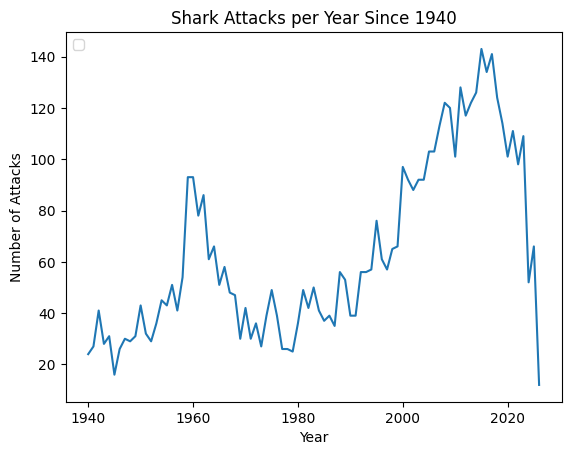

In [85]:
# Question 2 (continued)

### 4. year var
shark_attacks_df['Year'].unique()
shark_attacks_df['Year_clean'] = pd.to_numeric(shark_attacks_df['Year'], errors='coerce')
print(shark_attacks_df['Year_clean'].unique())
shark_attacks_recent = shark_attacks_df[shark_attacks_df['Year_clean']>=1940]
shark_attacks_recent['Year_clean'] = shark_attacks_recent['Year_clean'].astype(int)
print(shark_attacks_recent['Year_clean'].unique())
shark_attacks_recent['Year_clean'].value_counts()

attacks_per_year = shark_attacks_recent['Year_clean'].value_counts().sort_index()
x = attacks_per_year.index
y = attacks_per_year.values

plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Shark Attacks per Year Since 1940')
plt.legend(loc='upper left')
plt.show()

# The attacks have a trend of increasing over time as shown in the line plot.

In [9]:
# Question 2 (continued)
### 5. cleaning age var
shark_attacks_df['Age'].unique()
shark_attacks_df['Age_clean'] = pd.to_numeric(shark_attacks_df['Age'], errors='coerce')

x = shark_attacks_df['Age_clean']
plt.hist(x, bins=10)
plt.xlabel('Age of Victim')
plt.ylabel('Number of Attacks')
plt.title('Histogram of Shark Attack Victim Ages')
plt.show()

### 6. cleaning type var
shark_attacks_df['Type'].unique()
shark_attacks_df.loc[shark_attacks_df['Type'].str.contains('Provoked', case=False, na=False), 'Type_clean'] = 'Provoked'
shark_attacks_df.loc[shark_attacks_df['Type'].str.contains('Unprovoked', case=False, na=False), 'Type_clean'] = 'Unprovoked'
shark_attacks_df['Type_clean'] = shark_attacks_df['Type_clean'].fillna('Unknown')
shark_attacks_df['Type_clean'].unique()
proportion_unprovoked = (shark_attacks_df['Type_clean'] == 'Unprovoked').mean()
print("Proportion of unprovoked attacks:" + str(proportion_unprovoked))

# Proportion of unprovoked attacks:0.7387616624257846

### 7. cleaning fatal y/n var
shark_attacks_df['Fatal_clean'] = shark_attacks_df['Fatal Y/N']
shark_attacks_df.loc[shark_attacks_df['Fatal_clean'].str.contains('Y', case=False, na=False), 'Fatal_clean'] = 'Y'
shark_attacks_df.loc[shark_attacks_df['Fatal_clean'].str.contains('N', case=False, na=False), 'Fatal_clean'] = 'N'
# following line suggested by ChatGPT(Couldn't figure out how to clean other outputs other than na)
shark_attacks_df.loc[shark_attacks_df['Fatal_clean'].isin(['Y', 'N']) == False, 'Fatal_clean'] = 'Unknown'
shark_attacks_df['Fatal_clean'].unique()

### 8. Unprovoked are more likely to be fatal as shown in the proportion of unprovoked attacks
# output for percentage. I think this is very interesting, and is likely because
# the person who is going into unprovoked area are likely not prepared to go into
# the water and unaware of that risk.

NameError: name 'shark_attacks_df' is not defined

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

question 3 responses
1. From the abstract, the paper is about organization of data, so that one is able to analyze efficiently. The paper is called tidy data because it explains the importance of structure within data to ensure that datasets are clean and user-friendly.
2. The "tidy data standard" is a way to normalize the way data is organized. This is so that when people use it, it is all in the same format and makes sense to the user. Also, it allows for code to be re-used and applied this way.
3. The sentence "Like families, tidy datasets are all alike but every messy dataset is messy in its own way" means that not all datasets will be the same. So, althought there is some commonality among them, they consist of different content as it varies with the data itself. The second sentence, " For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general," means that one is able to find what is being compared/found in a data set but it is difficult to see trends and informtion about these variables.
4. Values are single measurements, variables are groups of values that are also measurements, and observations are the measurements in one unit.
5. In section 2.3, tidy data is described as very structured and organized stating three rules: 1) each variables forms a column, 2) each observation forms a row, and 3) each type of observational unit forms a table. These are broken down into separate tables with different types of data.
6. Most common problems: 1) column headers are values, not variable names, 2) multiple variables are stored in one column, 3) variables are stored in both rows and columns, 4) multiple types of observational units are stored in the same table 5) a single observational unit iss tored in multiple tables. Table 4 is messy because income levels are column names instead of values. "Melting" is to turn columns into rows. So in table 4, melting would resolve this issue since the values will be in one column instead of multiple.
7. Table 11 is messy because there is a column for each possible day in the month even though there are not values for every single day. This includes missing values.
Table 12a is molten because instead of values, the element column contains variable name which mean tht variable names are values. However, it is more clean than 11 because it does not contain missing values. 12b has each row as a measurement for a singl eday with tmax and tmin with other variables fixed. So all of the variabels and rows are in the right structure because variables are columns and rows are observations.


**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

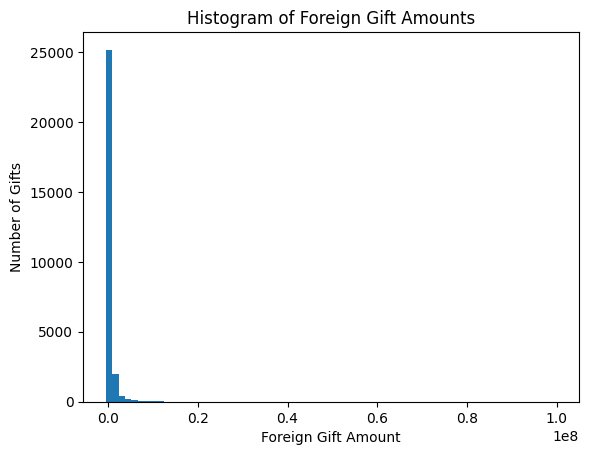

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64


In [17]:
# Question 4
### 1. loading dataset
foreigngifts_df = pd.read_csv('./data/ForeignGifts_edu.csv')
foreigngifts_df.head()
foreigngifts_df.columns

### 2. gift amount histogram
foreigngifts_df.columns
x_fg = foreigngifts_df['Foreign Gift Amount']
plt.hist(x_fg.dropna(), bins=70)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Number of Gifts')
plt.title('Histogram of Foreign Gift Amounts')
plt.show()

# Findings: The distribution is right skewed so that means the majority of
# foreign gifts are usually low in gift amount and there are few large gift
# amounts.


In [25]:
# Question 4 (cont)

### 3. gift type histogram
gift_type_count = foreigngifts_df['Gift Type'].value_counts()
print(gift_type_count)
contracts_prop = (foreigngifts_df['Gift Type'] == 'Contract').mean()
realestate_prop = (foreigngifts_df['Gift Type'] == 'Real Estate').mean()
monetary_prop = (foreigngifts_df['Gift Type'] == 'Monetary Gift').mean()
print("Contracts Proportion:" + str(contracts_prop))
print("Real Estate Proportion:" + str(realestate_prop))
print("Monetary Proportion:" + str(monetary_prop))
# Below are the proportions for each gift type from the code above:
# Contracts Proportion:0.6120973742957372
# Real Estate Proportion:0.00038978065979235324
# Monetary Proportion:0.3875128450444704

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Contracts Proportion:0.6120973742957372
Real Estate Proportion:0.00038978065979235324
Monetary Proportion:0.3875128450444704


In [36]:
# Question 4 (cont)

### 4. top 15 countries in terms of gifts
top_15_gifts = foreigngifts_df.groupby('Country of Giftor')['ID'].count()
top_15_gifts = top_15_gifts.sort_values(ascending=False)
print(top_15_gifts.head(15))

# top 15 countries in terms of amount
top_15_amt = foreigngifts_df.groupby('Country of Giftor')['Foreign Gift Amount'].sum()
top_15_amt = top_15_amt.sort_values(ascending=False)
print(top_15_amt.head(15))

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: ID, dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


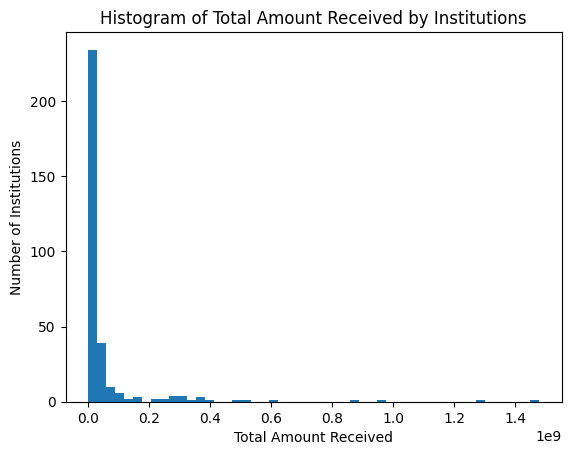

In [38]:
# Question 4 (cont)

### 5. top 15 institutions in total amt of money they receive
top_15_received = foreigngifts_df.groupby('Institution Name')['Foreign Gift Amount'].sum()
top_15_received = top_15_received.sort_values(ascending=False)
top_15_received.head(15)

# histogram
plt.hist(top_15_received, bins=50)
plt.xlabel('Total Amount Received')
plt.ylabel('Number of Institutions')
plt.title('Histogram of Total Amount Received by Institutions')
plt.show()

In [43]:
# Question 4 (cont)
### 6. gifts most money
top_gifts = foreigngifts_df.groupby('Giftor Name')['Foreign Gift Amount'].sum()
top_gifts = top_gifts.sort_values(ascending = False)
top_gifts

# The top giftors are Qatar Foundation ($1166503744), Qatar Foundation/Qatar National Res($796197000),
# Qatar Foundation for Education ($373945215), (Anonymous($338793629),  and
# Saudi Arabian Cultural Mission($275221475).

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
...,...
"Noh, Jongyoun",1
"Zhang, Stephanie",1
"VISETSUTH, PEERANUT",1


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [9]:
# Question 5
### 1 and 2. loading dataset and head()
college_completion_df = pd.read_csv('./data/college_completion.csv')
print(college_completion_df.head())
college_completion_df.shape
# (3798, 63)

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ...   
3  Resea

(3798, 63)

In [11]:
# Question 5 (cont)
### 3. crosstab
college_completion_df.columns
pd.crosstab(college_completion_df['control'], college_completion_df['level'], dropna=False)

# The data shows that people have completed four years of schooling that is private
# not-for-profit. It shows that this is least likely for 2 year schooling. People are
# more likely to go to a 2-year publuc university than private.

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


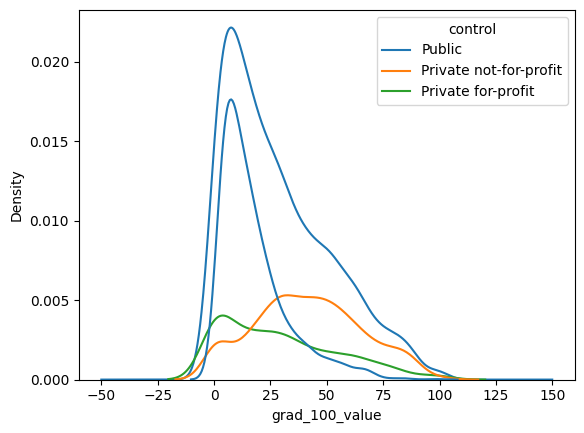

In [17]:
# Question 5 (cont)
### 4. kernal density
college_completion_df['grad_100_value'].plot.kde()
college_completion_df['grad_100_value'].describe()
sns.kdeplot(college_completion_df, x='grad_100_value', hue='control')
college_completion_df.groupby('control')['grad_100_value'].describe()

# Private not-for-profit schools have the highest graduation rates with
#average at around 41%.

,grad_100_value,aid_value
grad_100_value,0.054348,0.021463
aid_value,0.021463,0.024178


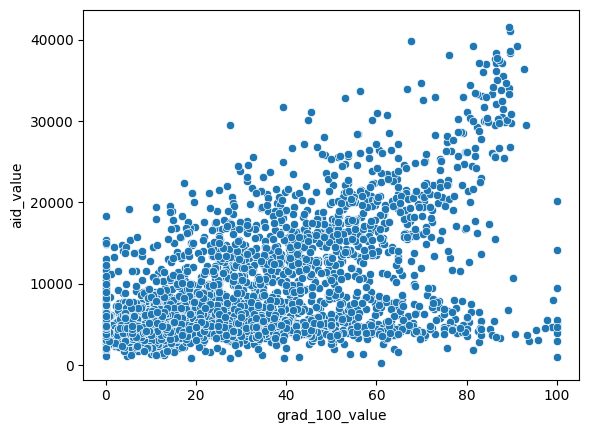

In [23]:
# Question 5 (cont)
### 5. scatterplot
sns.scatterplot(x=college_completion_df['grad_100_value'], y= college_completion_df['aid_value'])
val = college_completion_df.loc[:,['grad_100_value', 'aid_value']]
val.describe()
def minmax(val):
  u = (val-min(val))/(max(val)-min(val))
  return u
u=val.apply(minmax)

In [24]:
u.describe()

,grad_100_value,aid_value
count,3467.000000,3797.000000
mean,0.283645,0.185691
std,0.233127,0.155492
min,0.000000,0.000000
25%,0.090000,0.090200
50%,0.225000,0.118999
75%,0.436500,0.219178
max,1.000000,1.000000


In [25]:
u.cov()

,grad_100_value,aid_value
grad_100_value,0.054348,0.021463
aid_value,0.021463,0.024178


In [26]:
u.corr()
#Coariance shows that there is no clear linear relationship as the results are
# not closer to 1 but zero instead. It could be correlted that graduation rates
# and aid values are correlated by te value is around 0.57.

,grad_100_value,aid_value
grad_100_value,1.000000,0.575879
aid_value,0.575879,1.000000


grad_100_value  aid_value
control                                                         
Private for-profit     grad_100_value        0.065545   0.001671
                       aid_value             0.001671   0.001148
Private not-for-profit grad_100_value        0.055466   0.026468
                       aid_value             0.026468   0.035444
Public                 grad_100_value        0.021696   0.003719
                       aid_value             0.003719   0.002678

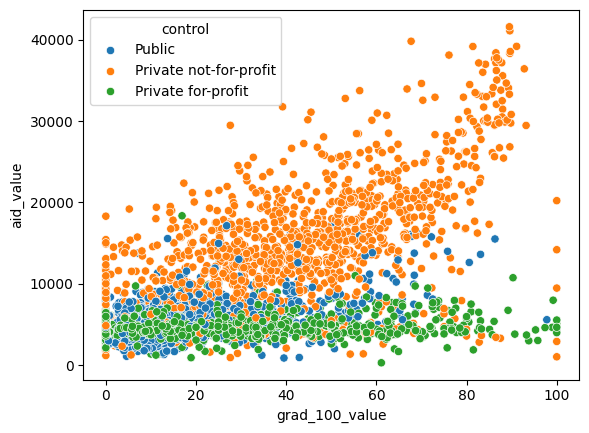

In [30]:
sns.scatterplot(data=college_completion_df, x='grad_100_value', y='aid_value', hue = 'control')
u['control'] = college_completion_df['control']
u.groupby('control').cov()

In [32]:
u.groupby('control').corr()
# Correlation shows that aid value and grad_100_value have the strongest correlation for
#private-not-for profit schools. The other values are below 0.5 thus suggesting no
# strong correlations.

grad_100_value  aid_value
control                                                         
Private for-profit     grad_100_value        1.000000   0.188363
                       aid_value             0.188363   1.000000
Private not-for-profit grad_100_value        1.000000   0.601591
                       aid_value             0.601591   1.000000
Public                 grad_100_value        1.000000   0.482481
                       aid_value             0.482481   1.000000

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

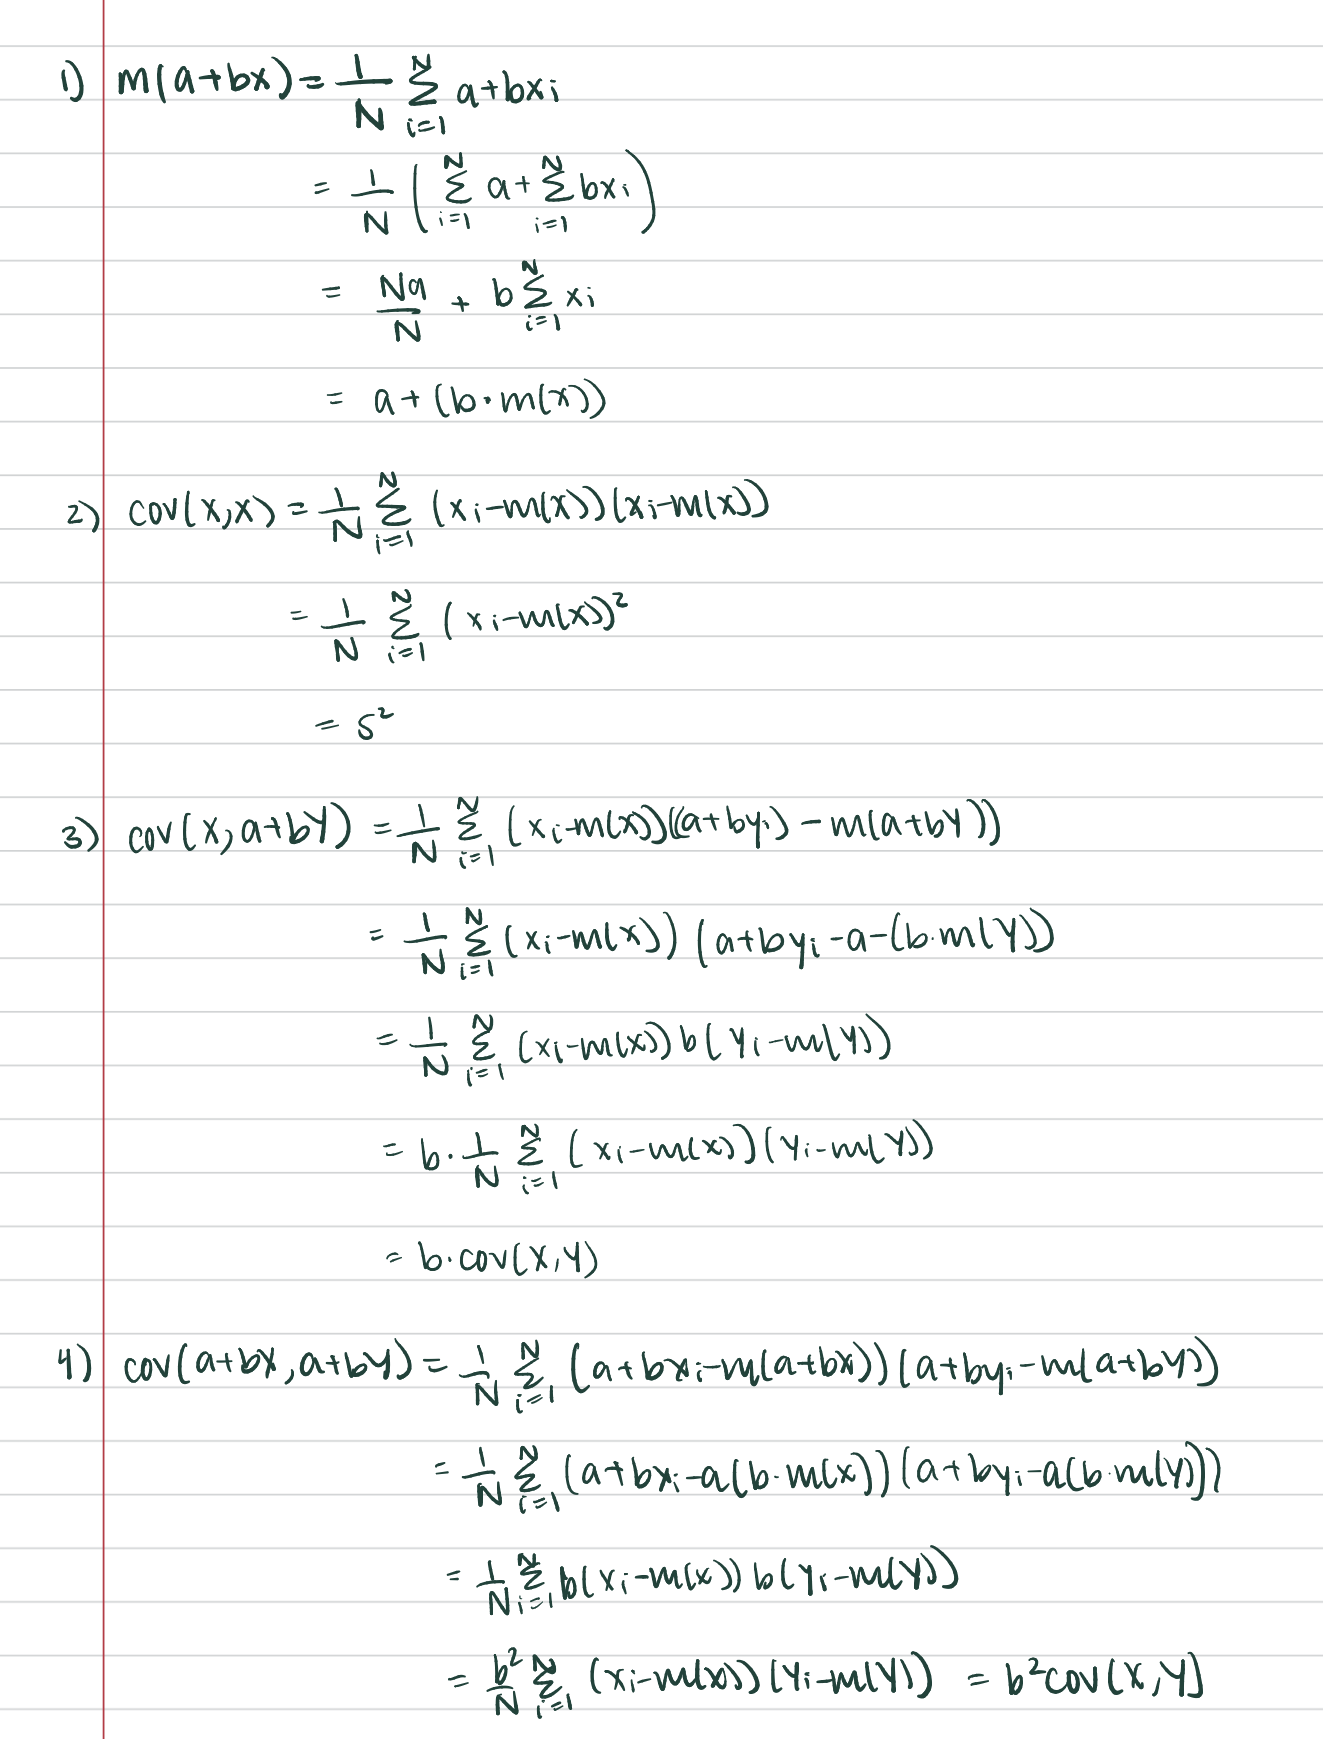

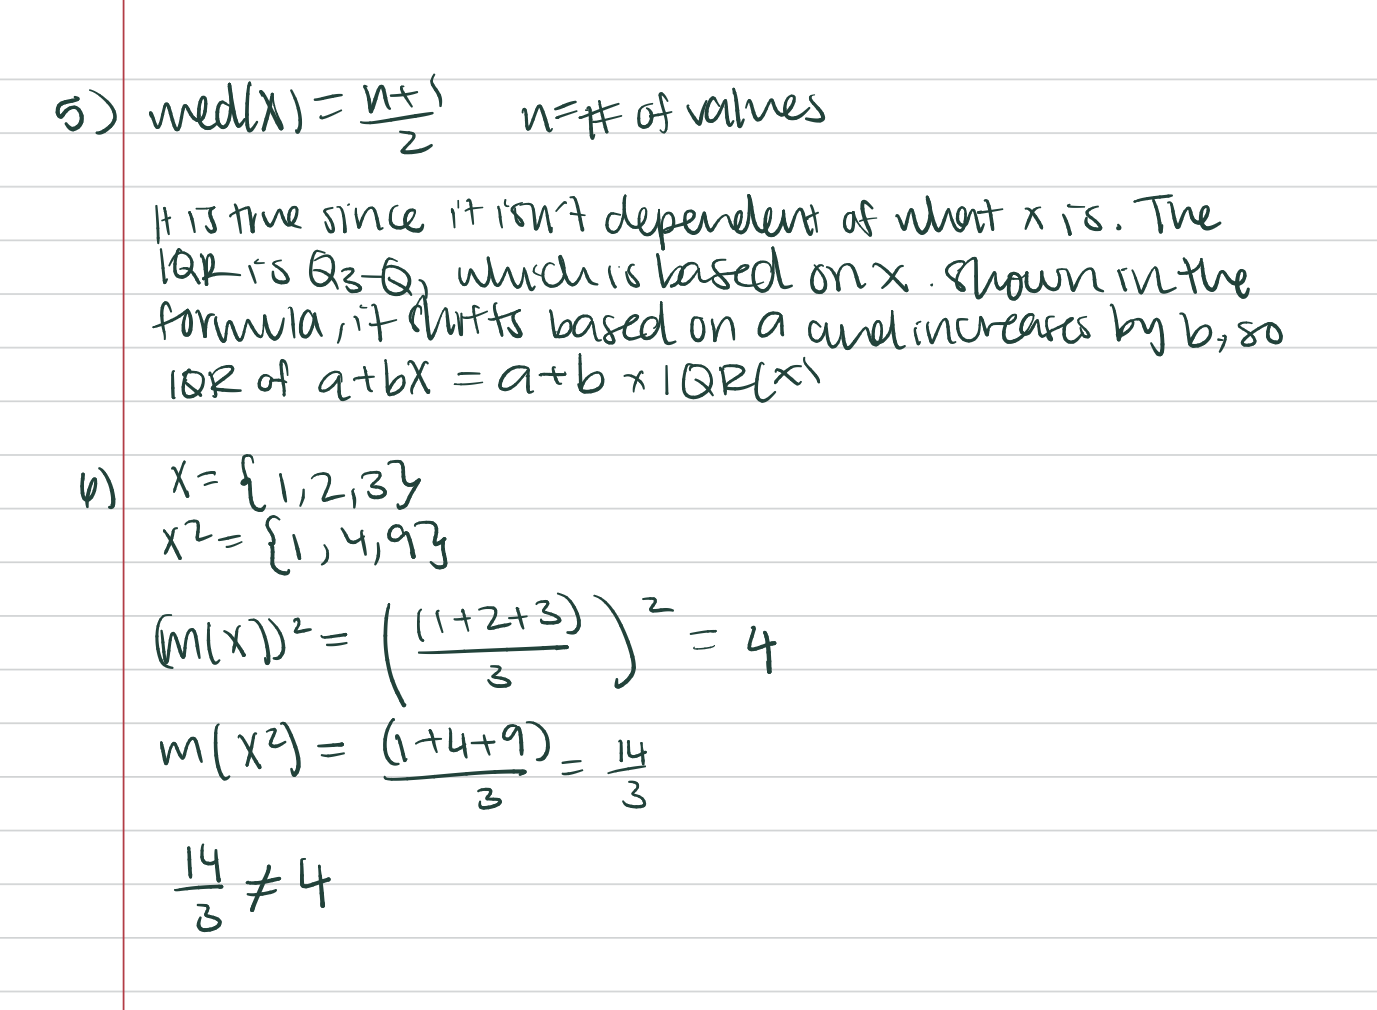

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [47]:
import seaborn as sns

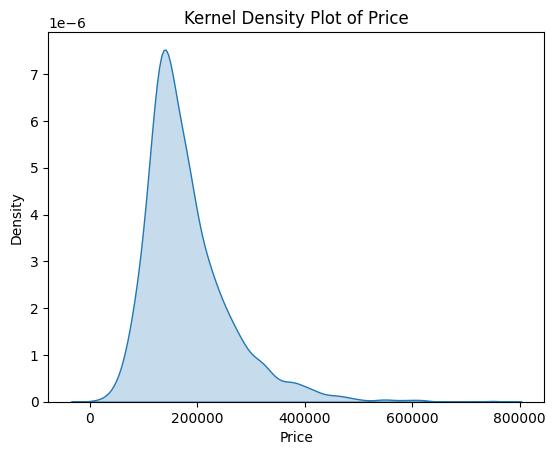

MeansBldg.Type
1Fam      184812.041237
2fmCon    125581.709677
Duplex    139808.935780
Twnhs     135934.059406
TwnhsE    192311.914163
Name: price, dtype: float64
StdBldg.Type
1Fam      82821.802329
2fmCon    31089.239840
Duplex    39498.973534
Twnhs     41938.931130
TwnhsE    66191.738021
Name: price, dtype: float64


In [53]:
# Question 7
### 1. loading data
ames_prices_df = pd.read_csv('./data/ames_prices.csv')
ames_prices_df.head()

### 2. kernel density plot
sns.kdeplot(ames_prices_df['price'], fill=True)
plt.title('Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()
#grouping
grouped = ames_prices_df.groupby('Bldg.Type')['price']
grouped.describe()
print("Means " +str(grouped.mean()))
# On average, TwnhsE, which I believe are townhouses, are the most
# expensive because they have the highest mean price of $192312.
# They are followed by 1Fam at $184812.

print("Std " + str(grouped.std()))
# 1Fam has the greatest variation as the standard deviation is largest
# for this building type, followed by TwnhsE. The standard deviation for
# 1Fam is 82821.

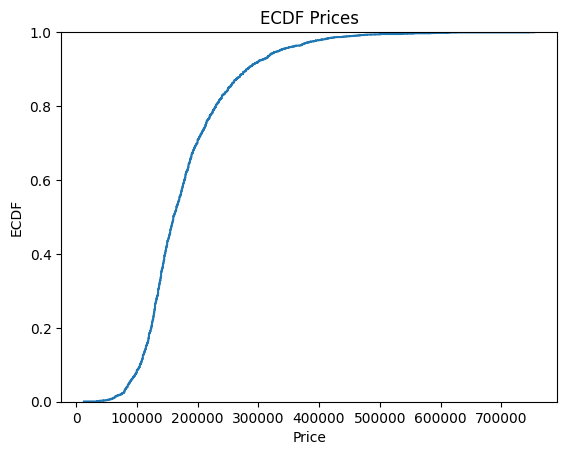

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


In [58]:
# Question 7 (cont)
### 3. ECDF plot
sns.ecdfplot(ames_prices_df['price'])
plt.title('ECDF Prices')
plt.xlabel('Price')
plt.ylabel('ECDF')
plt.show()

stats_summary = ames_prices_df['price'].describe()
print(stats_summary)
# this was my output:
# count      2930.000000
#mean     180796.060068
#std       79886.692357
#min       12789.000000
#25%      129500.000000
#50%      160000.000000
#75%      213500.000000
#max      755000.000000

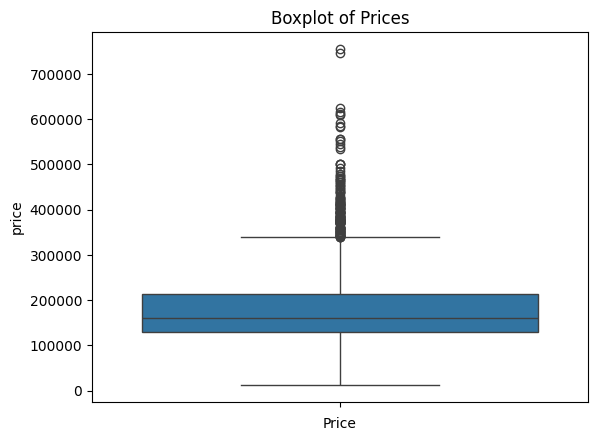

84000.0


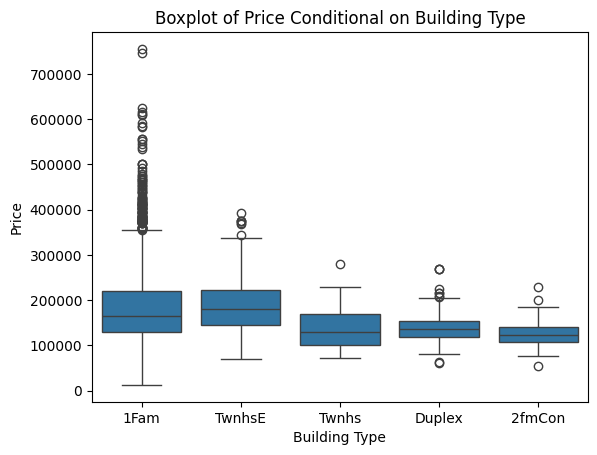

In [64]:
# Question 7 (cont)
### 4. Boxplots
#boxplot for prices
sns.boxplot(ames_prices_df['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

# Yes, there are outliers as shown by the points outside the interquartile
# range shown by Q1 and Q3 lines in the boxplot.

# boxplot of price conditional on building type
# used chatgpt, had to look up how to put multiple variables into boxplot.
sns.boxplot(x='Bldg.Type', y='price', data=ames_prices_df)
plt.title('Boxplot of Price Conditional on Building Type')
plt.xlabel('Building Type')
plt.ylabel('Price')
plt.show()

# The patterns I see are TwnhsE being the highest median price and high variance
# with 1Fam as we saw earlier when looking at mean and std. The outliers in both
# boxplots are of expensive houses/building types.


In [74]:
# Question 7 (cont)
### 5. Dummy Var
Q1 = ames_prices_df['price'].quantile(0.25)
Q3 = ames_prices_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

ames_prices_df['price_is_outlier'] = ((ames_prices_df['price'] < lower_whisker)
|(ames_prices_df['price']< upper_whisker)).astype(int)
ames_prices_df['price_is_outlier'].value_counts()

,count
price_is_outlier,
1,2793
0,137


In [76]:
# Question 7 (cont)
### 6. Winsorize
ames_prices_df['price_winsorize'] = ((ames_prices_df['price'] < lower_whisker) * lower_whisker
+ (ames_prices_df ['price'] > upper_whisker) * upper_whisker
+ ((ames_prices_df['price'] >= lower_whisker) & (ames_prices_df['price'] <= upper_whisker)) * ames_prices_df['price'])

ames_prices_df[['price', 'price_winsorize']].describe()

# The results for price vs price_winsorize show that the mean has decreased
# by around 3,000 because there are no longer the high outliers. Additionally,
# the standard deviation has gone down because the outliers are no longer
# increasing variation.

,price,price_winsorize
count,2930.000000,2930.000000
mean,180796.060068,177082.283959
std,79886.692357,67906.837135
min,12789.000000,12789.000000
25%,129500.000000,129500.000000
50%,160000.000000,160000.000000
75%,213500.000000,213500.000000
max,755000.000000,339500.000000
